In [32]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset here
crops = pd.read_csv("soil_measures.csv")  # Or 'data/soil_measures.csv' if in a subfolder

# Clean up column names
crops.columns = crops.columns.str.strip().str.lower()
crops.head()


,n,p,k,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [33]:
crops['crop'].value_counts()
crops.describe()


,n,p,k,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [34]:
features = ['n', 'p', 'k', 'ph']
target = 'crop'

scores = {}

for feature in features:
    X = crops[[feature]]
    y = crops[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=1000)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[feature] = acc

scores


/Users/mamabeast/PyCharmMiscProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mamabeast/PyCharmMiscProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

{'n': 0.1484848484848485,
 'p': 0.18333333333333332,
 'k': 0.2696969696969697,
 'ph': 0.11060606060606061}

In [35]:
best_feature = max(scores, key=scores.get)
best_score = scores[best_feature]

best_predictive_feature = {best_feature: best_score}
best_predictive_feature


{'k': 0.2696969696969697}

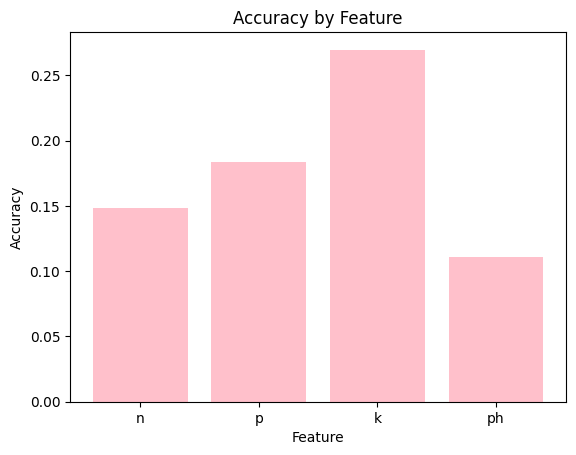

In [36]:
import matplotlib.pyplot as plt

plt.bar(scores.keys(), scores.values(), color='pink')
plt.title("Accuracy by Feature")
plt.ylabel("Accuracy")
plt.xlabel("Feature")
plt.show()


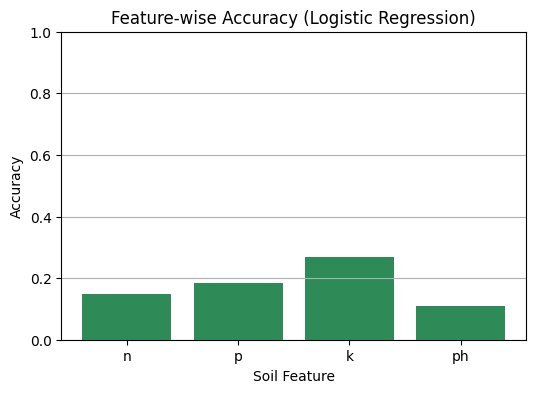

In [37]:
import matplotlib.pyplot as plt

# Plot accuracy for each single feature
plt.figure(figsize=(6,4))
plt.bar(scores.keys(), scores.values(), color='seagreen')
plt.title("Feature-wise Accuracy (Logistic Regression)")
plt.xlabel("Soil Feature")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


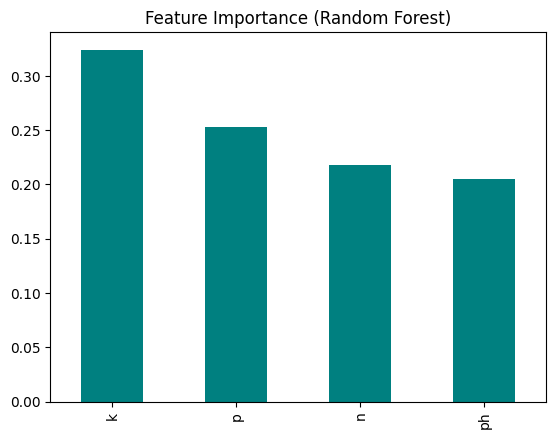

In [38]:
from sklearn.ensemble import RandomForestClassifier

X = crops[['n', 'p', 'k', 'ph']]
y = crops['crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances here very important
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', title="Feature Importance (Random Forest)", color='teal')
plt.show()


In [39]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


/Users/mamabeast/PyCharmMiscProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mamabeast/PyCharmMiscProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Best Params: {'C': 0.1, 'solver': 'lbfgs'}
Best Score: 0.6876623376623376


/Users/mamabeast/PyCharmMiscProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

       apple       0.69      0.26      0.38        34
      banana       1.00      1.00      1.00        26
   blackgram       0.50      0.50      0.50        26
    chickpea       0.97      1.00      0.99        34
     coconut       0.55      0.64      0.59        33
      coffee       0.90      0.90      0.90        30
      cotton       0.82      0.96      0.89        28
      grapes       0.43      0.83      0.57        23
        jute       0.61      0.59      0.60        34
 kidneybeans       0.48      0.33      0.39        36
      lentil       0.37      0.77      0.50        22
       maize       0.91      0.81      0.86        26
       mango       0.63      0.69      0.66        32
   mothbeans       0.57      0.35      0.44        34
    mungbean       0.61      0.73      0.67        30
   muskmelon       0.52      0.46      0.49        24
      orange       0.93      1.00      0.96        25
   

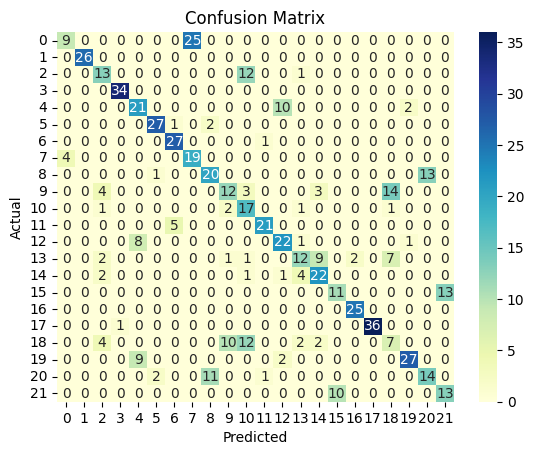

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = grid.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy using all features:", accuracy_score(y_test, y_pred))


Accuracy using all features: 0.6409090909090909


/Users/mamabeast/PyCharmMiscProject/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# app.py
import streamlit as st
import pandas as pd
import pickle

st.title("🌾 Crop Recommender Based on Soil Metrics")
n = st.number_input("Nitrogen")
p = st.number_input("Phosphorus")
k = st.number_input("Potassium")
ph = st.number_input("pH Level")

if st.button("Predict Crop"):
    model = pickle.load(open("crop_model.pkl", "rb"))
    crop = model.predict([[n, p, k, ph]])[0]
    st.success(f"Recommended Crop: {crop}")


2025-05-19 11:09:32.658 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:09:32.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:09:32.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:09:32.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:09:32.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:09:32.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:09:32.677 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-19 11:09:32.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar